# The Beatles songs EDA
This small EDA is conducted to prepare a small case study for the *Popular Music Datasets* paper.

Starting points: The Beatles songs dataset version *The Beatles songs dataset, 285x45, v0.csv*, resulting from the *spotipy-getting-started* project.

## Import statements

In [65]:
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt

## Read The Beatles songs dataset

In [251]:
# Get the songs as a pd.DataFrame object from '../data/The Beatles songs dataset, 285x45, v0.csv'
songs = pd.read_csv('../data/The Beatles songs dataset, 285x45, v0.csv')
display(songs.sample(10))

,URI,Title,Year,Album,Popularity,Duration,Key,Mode,Tempo,Time_signature,...,Weeks at No1 in UK (The Guardian),Highest position (Billboard),Weeks at No1 (Billboard),Top 50 (Billboard),Top 50 (Ultimate classic rock),Top 50 (Rolling Stone),Top 50 (NME),Top 50 (Top50songs.org),"Top 50 (USA today, 2017)","Top 50 (Vulture, by Bill Wyman)"
199,spotify:track:7Ho3T7ERfooiAfvODaMQ2N,Rock and Roll Music,1964,Beatles for Sale,55.0,150.0,9.0,1.0,167.092,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,spotify:track:3pKKxkeB1pOUMHwWBmKc3Y,Fixing a Hole,1967,Sgt. Pepper's Lonely Hearts Club Band,56.0,146.0,0.0,0.0,112.984,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.0,NaN
110,spotify:track:0sIZcoe69iSym9AecvZ7CT,I Wanna Be Your Man,1963,With the Beatles,49.0,103.0,9.0,1.0,99.138,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,spotify:track:68BTFws92cRztMS1oQ7Ewj,All You Need Is Love,1967,Magical Mystery Tour,68.0,237.0,7.0,1.0,103.436,4.0,...,NaN,1.0,NaN,15.0,23.0,21.0,24.0,7.0,33.0,NaN
257,spotify:track:7tBAxQ6hD4mhr1sYQhwWDP,We Can Work It Out,1965,Past Masters (Vols. 1 & 2 / Remastered),41.0,135.0,2.0,1.0,106.237,4.0,...,NaN,1.0,3.0,9.0,36.0,30.0,25.0,48.0,40.0,NaN
167,spotify:track:40qXGg5nRbcWzcFb26KWkQ,Misery,1963,Please Please Me,54.0,107.0,0.0,1.0,133.348,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,spotify:track:3pU1CUgPiFfxPCpscwIwQR,I Should Have Known Better,1964,A Hard Day's Night,59.0,164.0,7.0,1.0,130.704,4.0,...,NaN,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN
52,spotify:track:4OUmlC67FoPLvQNuE5C7kF,Dig a Pony,1969,Let It Be,54.0,232.0,11.0,0.0,59.004,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,spotify:track:5BhMoGrz5KzG2fA5uzHjZ1,Don't Let Me Down,1969,Past Masters (Vols. 1 & 2 / Remastered),48.0,215.0,4.0,1.0,163.630,4.0,...,NaN,NaN,NaN,NaN,NaN,46.0,NaN,NaN,NaN,NaN
133,spotify:track:3KfbEIOC7YIv90FIfNSZpo,In My Life,1965,Rubber Soul,79.0,148.0,9.0,1.0,103.239,4.0,...,NaN,NaN,NaN,NaN,5.0,5.0,12.0,34.0,2.0,42.0


## Show the dataset columns

In [27]:
songs.columns

Index(['URI', 'Title', 'Year', 'Album', 'Popularity', 'Duration', 'Key',
       'Mode', 'Tempo', 'Time_signature', 'Valence', 'Danceability', 'Energy',
       'Loudness', 'Acousticness', 'Instrumentalness', 'Liveness',
       'Speechiness', 'Album debut', 'Other releases', 'Single A side',
       'Single B side', 'Single certification', 'Genre', 'Styles', 'Themes',
       'Moods', 'Songwriter(s)', 'Lead vocal(s)', 'Cover', 'Covered by',
       'Chart position UK (Wikipedia)', 'Chart position US (Wikipedia)',
       'Highest position (The Guardian)',
       'Weeks on chart in UK (The Guardian)',
       'Weeks at No1 in UK (The Guardian)', 'Highest position (Billboard)',
       'Weeks at No1 (Billboard)', 'Top 50 (Billboard)',
       'Top 50 (Ultimate classic rock)', 'Top 50 (Rolling Stone)',
       'Top 50 (NME)', 'Top 50 (Top50songs.org)', 'Top 50 (USA today, 2017)',
       'Top 50 (Vulture, by Bill Wyman)'],
      dtype='object')

## Turn charts data to *int* values
Do it for all chart positions, weeks on charts, highest chart position, and weeks at No.1 data. The first step is to replace all `NaN` values with -1. Then convert the values in all these columns to `int`.

In [252]:
# Example for a single column:
# songs['Top 50 (Billboard)'].where((songs['Top 50 (Billboard)']).notnull(), -1, inplace=True).head(20)

# For all relevant columns:
for column in songs.columns[31:]:
    # print(songs[column].where((songs[column]).notnull(), -1).astype(int).head(20))
    songs[column].where((songs[column]).notnull(), -1, inplace=True)
    songs[column] = songs[column].astype(int)
    print(songs[column].head(20))

0     -1
1     -1
2     -1
3     63
4      1
5     -1
6     -1
7     -1
8     -1
9     -1
10    -1
11    -1
12    -1
13    -1
14    -1
15     1
16    -1
17    -1
18    -1
19    -1
Name: Chart position UK (Wikipedia), dtype: int32
0     -1
1     -1
2     -1
3     -1
4      1
5     -1
6     -1
7     -1
8     -1
9     47
10    19
11    -1
12    45
13    -1
14    -1
15     1
16    12
17    -1
18    -1
19    -1
Name: Chart position US (Wikipedia), dtype: int32
0     -1
1     -1
2     -1
3     -1
4      1
5     -1
6     -1
7     -1
8     -1
9     -1
10    29
11    -1
12    -1
13    -1
14    -1
15    -1
16    -1
17    -1
18    -1
19    -1
Name: Highest position (The Guardian), dtype: int32
0     -1
1     -1
2     -1
3     -1
4     13
5     -1
6     -1
7     -1
8     -1
9     -1
10     6
11    -1
12    -1
13    -1
14    -1
15    -1
16    -1
17    -1
18    -1
19    -1
Name: Weeks on chart in UK (The Guardian), dtype: int32
0    -1
1    -1
2    -1
3    -1
4     3
5    -1
6    -1
7    -1
8    -1


In [253]:
# Save the modified dataset
songs.to_csv('../data/The Beatles songs dataset, 285x45, v1.csv', index=False)

## How many Beatles songs have reached Billboard Top 50?
Show a corresponding bar graph.

### Read The Beatles songs dataset

In [254]:
# Get the songs as a pd.DataFrame object from '../data/The Beatles songs dataset, 285x45, v1.csv'
songs = pd.read_csv('../data/The Beatles songs dataset, 285x45, v1.csv')
display(songs.sample(10))

,URI,Title,Year,Album,Popularity,Duration,Key,Mode,Tempo,Time_signature,...,Weeks at No1 in UK (The Guardian),Highest position (Billboard),Weeks at No1 (Billboard),Top 50 (Billboard),Top 50 (Ultimate classic rock),Top 50 (Rolling Stone),Top 50 (NME),Top 50 (Top50songs.org),"Top 50 (USA today, 2017)","Top 50 (Vulture, by Bill Wyman)"
209,spotify:track:48JM82SHQTBYkhEYhMaOaa,She Loves You,1963,Past Masters (Vols. 1 & 2 / Remastered),51.0,138.0,7.0,1.0,75.442,4.0,...,6,1,2,3,14,14,34,24,-1,4
197,spotify:track:5dZ8PeKKZJLIQAWNTdp8WX,Revolution 9,1968,The Beatles,47.0,502.0,2.0,0.0,91.158,4.0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
231,spotify:track:5AxDzt8VmHreQaDatK6TD4,That'll Be the Day,1958,Anthology 1,36.0,128.0,9.0,1.0,134.468,4.0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
77,spotify:track:01SfTM5nfCou5gQL70r6gs,Golden Slumbers,1969,Abbey Road,70.0,91.0,0.0,1.0,80.608,4.0,...,-1,-1,-1,-1,-1,-1,-1,45,-1,-1
149,spotify:track:1wSZ0SwBymmDV96CtlGl9o,Lonesome Tears in My Eyes,1963,Live at the BBC,28.0,156.0,4.0,1.0,161.701,4.0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
165,spotify:track:1DkUmd3seTv3HZ3kfNgtxK,"Memphis, Tennessee",1963,Live at the BBC,22.0,136.0,11.0,1.0,98.125,4.0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
282,spotify:track:7rgUYidQh5tH0YlXCoKaYJ,You've Really Got a Hold on Me,1963,With the Beatles,54.0,182.0,9.0,1.0,77.643,4.0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
220,spotify:track:1e6CxoqLmVADMyDW72cppZ,Step Inside Love / Los Paranoias,1968,Anthology 3,28.0,151.0,7.0,1.0,132.190,1.0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
16,spotify:track:65vdMBskhx3akkG9vQlSH1,And I Love Her,1964,A Hard Day's Night,74.0,152.0,1.0,0.0,113.312,4.0,...,-1,12,-1,37,-1,-1,-1,-1,-1,-1
259,spotify:track:6C6y4OWK1Ki3FVF1TIonxW,What You're Doing,1964,Beatles for Sale,47.0,150.0,2.0,1.0,129.506,4.0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


### Add another column, *Top50*
A song has reached Billboard Top 50 chart (`Yes`), or it hasn't (`No`).

In [255]:
songs['Top50'] = 'No'

Create the index of the songs that HAVE reached Billboard Top 50: `i = songs.loc[songs['Top.50.Billboard'] != -1].index` or `i = np.array(songs.loc[songs['Top.50.Billboard'] != -1].index)`.

In [256]:
t50 = songs['Top 50 (Billboard)'] != -1

Change the values of `Top50` corresponding to the created index to `Yes`.

In [257]:
songs.loc[t50, 'Top50'] = 'Yes'

Check if the newly added `Top50` column is now OK. Try this using the index created in the previous step, as well as using `i = songs.loc[songs['Top.50.Billboard'] != -1].index` directly.

In [259]:
songs.loc[t50, ['Title', 'Top50']]

,Title,Top50
4,A Hard Day's Night,Yes
9,Act Naturally,Yes
10,Ain't She Sweet,Yes
15,All You Need Is Love,Yes
16,And I Love Her,Yes
24,"Baby, You're a Rich Man",Yes
36,Can't Buy Me Love,Yes
43,Come Together,Yes
48,Day Tripper,Yes
54,Do You Want to Know a Secret?,Yes


<u>Save this version as a new *.csv* file, for use in the subsequent examples.</u> (`<pd.df>.to_csv('<path>')`)

In [261]:
songs.to_csv('../data/The Beatles songs dataset, 285x46, v0 (Top50).csv', index=False)

Replace manually the missing values for some `Year` data, consulting sources like *The Beatles Bible*, *Wikipedia*, and the like. The songs with missing `Year` values are:
- (You're So Square) Baby I Don't Care - Studio Jam
- A Beginning - Anthology 3 Version
- Across the Universe - Take 2 / Anthology 2 Version
- Besame Mucho, Anthology 1 Version
- Can You Take Me Back? - Take 1
- How Do You Do It?, Anthology 1 Version
- Los Paranoias - Studio Jam
- The Hippy Hippy Shake - Live at the BBBC for "Pop Go the Beatles"

Save the modified dataset as `../data/The Beatles songs dataset, 285x46, v1 (Top50).csv`. 

### Read The Beatles songs dataset (manually modified)

In [262]:
# Get the songs as a pd.DataFrame object from '../data/The Beatles songs dataset, 285x46, v1 (Top50).csv'
songs = pd.read_csv('../data/The Beatles songs dataset, 285x46, v1 (Top50).csv')
display(songs.sample(10))

,URI,Title,Year,Album,Popularity,Duration,Key,Mode,Tempo,Time_signature,...,Highest position (Billboard),Weeks at No1 (Billboard),Top 50 (Billboard),Top 50 (Ultimate classic rock),Top 50 (Rolling Stone),Top 50 (NME),Top 50 (Top50songs.org),"Top 50 (USA today, 2017)","Top 50 (Vulture, by Bill Wyman)",Top50
64,spotify:track:64P3zpRsDHIk7YTpRtaKYL,Everybody's Got Something to Hide Except Me an...,1968,The Beatles,52,144,2,1,117.089,4,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,No
108,spotify:track:3KiexfmhxHvG5IgAElmTkd,I Saw Her Standing There,1963,Please Please Me,71,175,4,1,160.109,4,...,12,-1,36,17,16,31,-1,17,21,Yes
248,spotify:track:6xAiyH80RTPPMBZwvWpTEN,Three Cool Cats,1962,Anthology 1,33,145,4,1,140.961,4,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,No
40,spotify:track:3JQWLa88R35d971o5bIImd,Chains,1963,Please Please Me,50,143,10,1,129.884,4,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,No
214,spotify:track:2x7vw79tKsW99s8sbyuvPM,Slow Down,1964,Rock 'n' Roll Music,39,175,0,1,168.618,4,...,25,-1,44,-1,-1,-1,-1,-1,-1,Yes
113,spotify:track:7orb0y6ySGdsYZywMoQtsD,I Want to Tell You,1966,Revolver,52,149,9,1,127.492,4,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,No
174,spotify:track:1H7gMYGykdtwZOV6s1N0by,Norwegian Wood (This Bird Has Flown),1965,Rubber Soul,75,125,4,1,176.625,3,...,-1,-1,-1,15,12,26,37,11,8,No
144,spotify:track:4iR7Jx9E4zY0Q7AwMyFpZZ,Leave My Kitten Alone,1964,Anthology 1,31,176,5,1,100.129,4,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,No
261,spotify:track:4oLQ0imA5IDtNUnhFKY87q,When I Get Home,1964,A Hard Day's Night,47,138,9,0,125.375,4,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,No
85,spotify:track:0F3N8OIn6obTkJfZWbOMrm,Hello Little Girl,1962,Anthology 1,33,100,2,1,76.593,4,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,No


In [263]:
# Check if there are missing values for Year
songs.Year.isnull().sum()

0

### Prepare the data for plotting the bar graph

Group the data - group the songs by the year of release.

In [264]:
songs_by_year = songs.groupby('Year')

Use `get_group(<year>)` to get all songs for a selected year and `value_counts()` over the resulting group's `Top50` column (showing the `Yes` and `No` subgroups). This is a precursor to creating the data for the y-axis of the bar graph.

In [265]:
display(songs_by_year.get_group(1966))
display(songs_by_year.get_group(1966).Top50.value_counts())
display(songs_by_year.get_group(1966).Top50.value_counts()['Yes'])

,URI,Title,Year,Album,Popularity,Duration,Key,Mode,Tempo,Time_signature,...,Highest position (Billboard),Weeks at No1 (Billboard),Top 50 (Billboard),Top 50 (Ultimate classic rock),Top 50 (Rolling Stone),Top 50 (NME),Top 50 (Top50songs.org),"Top 50 (USA today, 2017)","Top 50 (Vulture, by Bill Wyman)",Top50
17,spotify:track:4KRgqwb4kvBuTz1utbYxfb,And Your Bird Can Sing,1966,Revolver,58,121,4,1,132.590,4,...,-1,-1,-1,-1,-1,30,-1,-1,33,No
55,spotify:track:1ob06Ol8FMIPQgjpg7bMyk,Doctor Robert,1966,Revolver,52,135,4,1,164.626,4,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,No
62,spotify:track:5GjPQ0eI7AgmOnADn1EO6Q,Eleanor Rigby,1966,Revolver,72,128,4,0,137.831,4,...,11,-1,38,16,22,27,9,12,9,Yes
68,spotify:track:1kDkaFlmkdEZiVUogaP9OZ,For No One,1966,Revolver,67,121,1,0,81.208,4,...,-1,-1,-1,-1,40,18,-1,24,34,No
78,spotify:track:7HTH1ppjkkOe7RLoBDKXYJ,Good Day Sunshine,1966,Revolver,65,129,11,1,117.331,3,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,No
82,spotify:track:3tGhRLgcCP6SIZU3tbGl7l,Got to Get You Into My Life,1966,Revolver,60,147,0,1,136.679,4,...,7,-1,23,26,50,28,-1,-1,-1,Yes
91,spotify:track:2B4Y9u4ERAFiMo13XPJyGP,"Here, There and Everywhere",1966,Revolver,70,145,7,1,165.361,4,...,-1,-1,-1,-1,25,38,-1,-1,7,No
113,spotify:track:7orb0y6ySGdsYZywMoQtsD,I Want to Tell You,1966,Revolver,52,149,9,1,127.492,4,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,No
124,spotify:track:2ylCrFiBu98SC0vFfaCent,I'm Only Sleeping,1966,Revolver,60,182,8,0,103.477,4,...,-1,-1,-1,-1,-1,-1,-1,48,-1,No
154,spotify:track:4RdJFhfLQcezwN5LsXl4qP,Love You to,1966,Revolver,53,181,5,1,123.986,4,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,No


Top50
No     12
Yes     7
Name: count, dtype: int64

7

Build the data to plot by extracting relevant items from each group.

For x-axis, use `unique()` over the `Year` column and then `np.sort()` the results.

In [266]:
years = np.sort(songs.Year.unique())
years

array([1958, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
       1970, 1977, 1980], dtype=int64)

For y-axis, create the lists of the numbers of the songs that have reached Billboard Top 50 (`in_top50`) and of those that haven't (`not_in_top50`).
(Start from two empty lists. Loop over the sorted list of years created in the previous step, `get_group()` for each year and append the `value_counts()['Yes']` of the `Top50` column of the current year (`y['Top.50']`) to `in_top50` if any of `y['Top.50']` has the value `Yes`, otherwise append 0. Do the similar thing for `not_in_top50`. Display both lists in the end to double-check the result.)

In [267]:
in_top50 = []
not_in_top50 = []
for year in years:
    s = songs_by_year.get_group(year)
    in_top50.append(s.Top50.value_counts()['Yes'] if any(s['Top50'] == 'Yes') else 0)
    not_in_top50.append(s.Top50.value_counts()['No'] if any(s['Top50'] == 'No') else 0)
display(in_top50)
display(not_in_top50)
display(sum(in_top50))
display(sum(not_in_top50))
display(sum(in_top50) / sum(not_in_top50))

[0, 0, 2, 3, 6, 10, 7, 7, 3, 3, 6, 0, 1, 1]

[2, 3, 1, 7, 56, 28, 29, 12, 22, 45, 30, 1, 0, 0]

49

236

0.2076271186440678

And now plot the bar graph. Based on the second example from [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html) (using `<pd.df>.plot.bar()`, not Matplotlib or Seaborn).
For a complete list of parameters used in `**kwargs`, see [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html).
For a list of named colors (Matplotlib named colors), see [here](https://matplotlib.org/stable/gallery/color/named_colors.html#css-colors).

First create an auxiliary dataframe to use for plotting. Use `in_top50` and `not_in_top50` as the columns, <u>and the sorted list of years created above as the index of the dataframe</u>.

In [268]:
df = pd.DataFrame({'In Top 50': in_top50, 'Not in Top 50': not_in_top50}, index=years)

### Plot and save the bar graph

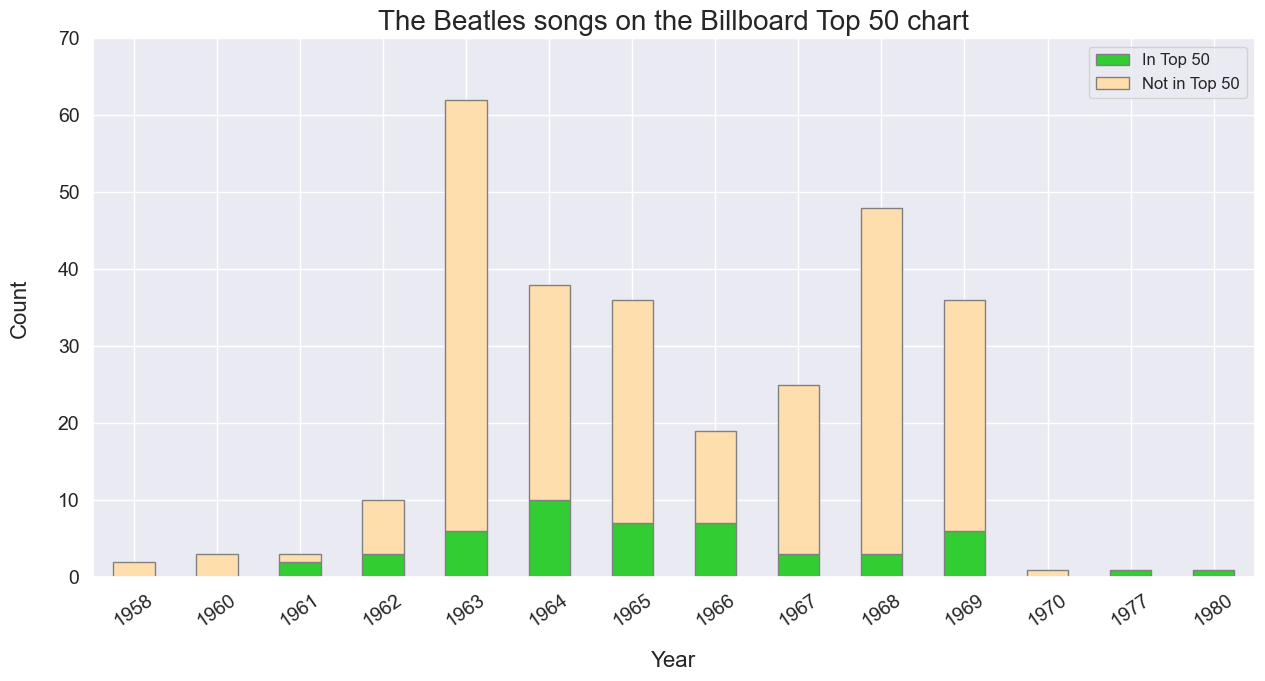

In [270]:
sb.set_theme(rc={'figure.figsize': (15, 8)})
# Create the plot
ax = df.plot(kind='bar', figsize=(15, 7), rot=35, ylim=(0, 70),
             color={'In Top 50': 'limegreen', 'Not in Top 50': 'navajowhite'}, edgecolor='grey',
             fontsize=14,
             stacked=True)

# Modify font sizes
ax.set_title('The Beatles songs on the Billboard Top 50 chart', fontsize=20)
ax.set_xlabel('Year', fontsize=16, labelpad=15)
ax.set_ylabel('Count', fontsize=16, labelpad=20)
ax.legend(fontsize=12)

# Save the plot
plt.savefig('../data/The Beatles Billboard Top 50 songs.png')

# Display the plot
plt.show()

## How have audio features of The Beatles songs evolved over their career? 

Read the dataset ('../data/The Beatles songs dataset, 285x46, v1 (Top50).csv').

In [271]:
# Get the songs as a pd.DataFrame object from '../data/The Beatles songs dataset, 285x46, v1 (Top50).csv'
songs = pd.read_csv('../data/The Beatles songs dataset, 285x46, v1 (Top50).csv')
display(songs.sample(10))

,URI,Title,Year,Album,Popularity,Duration,Key,Mode,Tempo,Time_signature,...,Highest position (Billboard),Weeks at No1 (Billboard),Top 50 (Billboard),Top 50 (Ultimate classic rock),Top 50 (Rolling Stone),Top 50 (NME),Top 50 (Top50songs.org),"Top 50 (USA today, 2017)","Top 50 (Vulture, by Bill Wyman)",Top50
129,spotify:track:788U1Sqej9M6c4iikuDGxO,I've Just Seen a Face,1965,Help!,66,127,9,1,120.418,3,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,No
187,spotify:track:4401c08DdNwwGEg8WGCkQf,Paperback Writer,1966,Past Masters (Vols. 1 & 2 / Remastered),40,138,7,1,157.251,4,...,1,2,19,33,35,17,-1,42,40,Yes
112,spotify:track:27E39dDg0Bx1RzkF3eJJsb,I Want to Hold Your Hand,1963,Past Masters (Vols. 1 & 2 / Remastered),41,144,7,1,131.011,4,...,1,7,2,9,2,3,16,18,49,Yes
94,spotify:track:2RvKsA6Ho7VbJkVFiD4UQF,Hold Me Tight,1963,With the Beatles,50,152,5,1,135.731,4,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,No
154,spotify:track:4RdJFhfLQcezwN5LsXl4qP,Love You to,1966,Revolver,53,181,5,1,123.986,4,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,No
106,spotify:track:2BMqay80iBzZTa608Y1eG1,I Me Mine,1970,Let It Be,57,145,9,0,185.235,3,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,No
25,spotify:track:0j3p1p06deJ7f9xmJ9yG22,Back in the U.S.S.R.,1968,The Beatles,65,163,9,1,142.489,4,...,-1,-1,-1,-1,-1,-1,27,-1,47,No
125,spotify:track:2X9H5BokS1u5O46YpNYNsZ,I'm So Tired,1968,The Beatles,58,123,9,1,68.492,4,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,No
167,spotify:track:40qXGg5nRbcWzcFb26KWkQ,Misery,1963,Please Please Me,54,107,0,1,133.348,4,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,No
41,spotify:track:49GqhxyTdBXAn4cB8EAbTo,Circles - Esher Demo,1968,The Beatles,30,137,8,1,101.504,3,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,No


### Valence

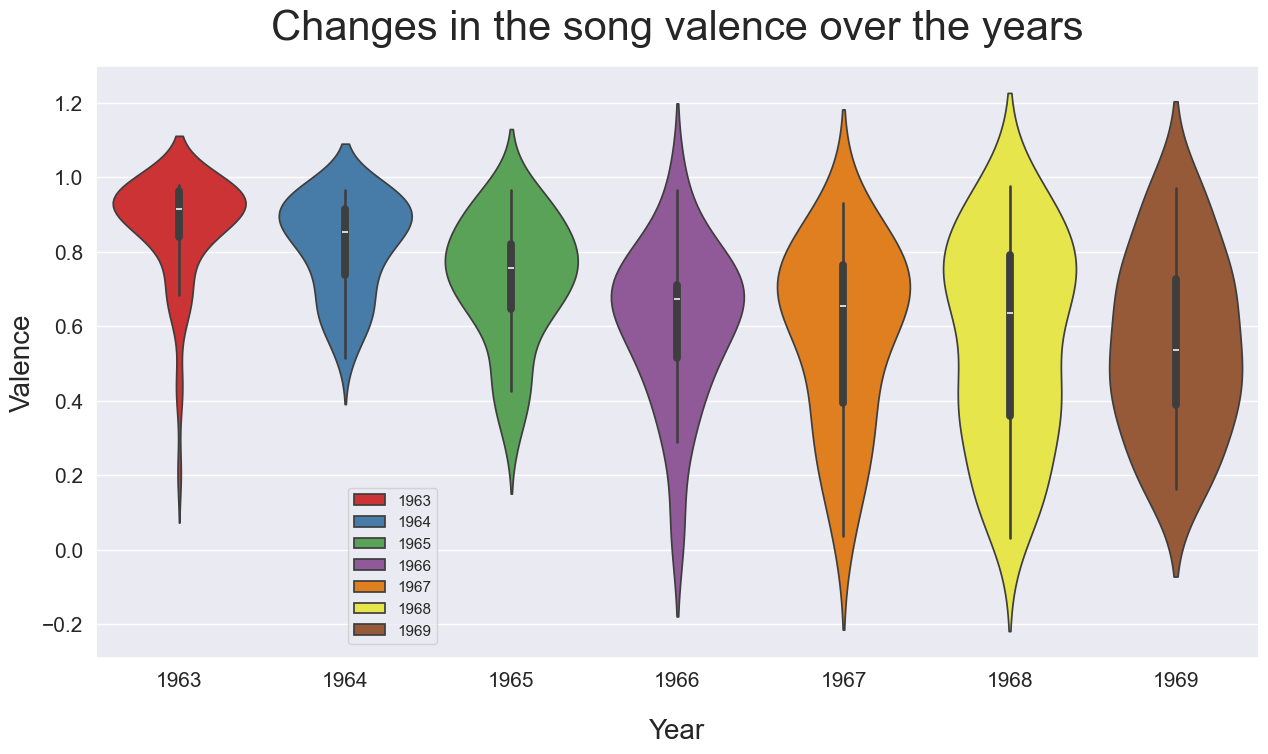

In [272]:
# Years to show the violin plots for
years = (songs.Year >= 1963) & (songs.Year <= 1969)

# Filter data by years and ensure Year is a categorical variable
filtered_data = songs.loc[years, :]
filtered_data.loc[:, 'Year'] = filtered_data['Year'].astype('category')

# Create the violin plot with categorical Year
v = sb.violinplot(x='Year', hue='Year', y='Valence', data=filtered_data, palette='Set1')

# Set plot parameters
v.axes.set_title('Changes in the song valence over the years',fontsize=30, y=1.03)
v.set_xlabel('Year',fontsize=20, labelpad=20)
v.set_ylabel('Valence',fontsize=20)
v.tick_params(labelsize=15)
v.legend(bbox_to_anchor=(0.3, 0.3))

# Adjust spacing between title and plot
plt.subplots_adjust(top=0.85)  # Adjust the top margin

# Save the plot
plt.savefig('../data/The Beatles songs valence.png')

plt.show()

### Energy

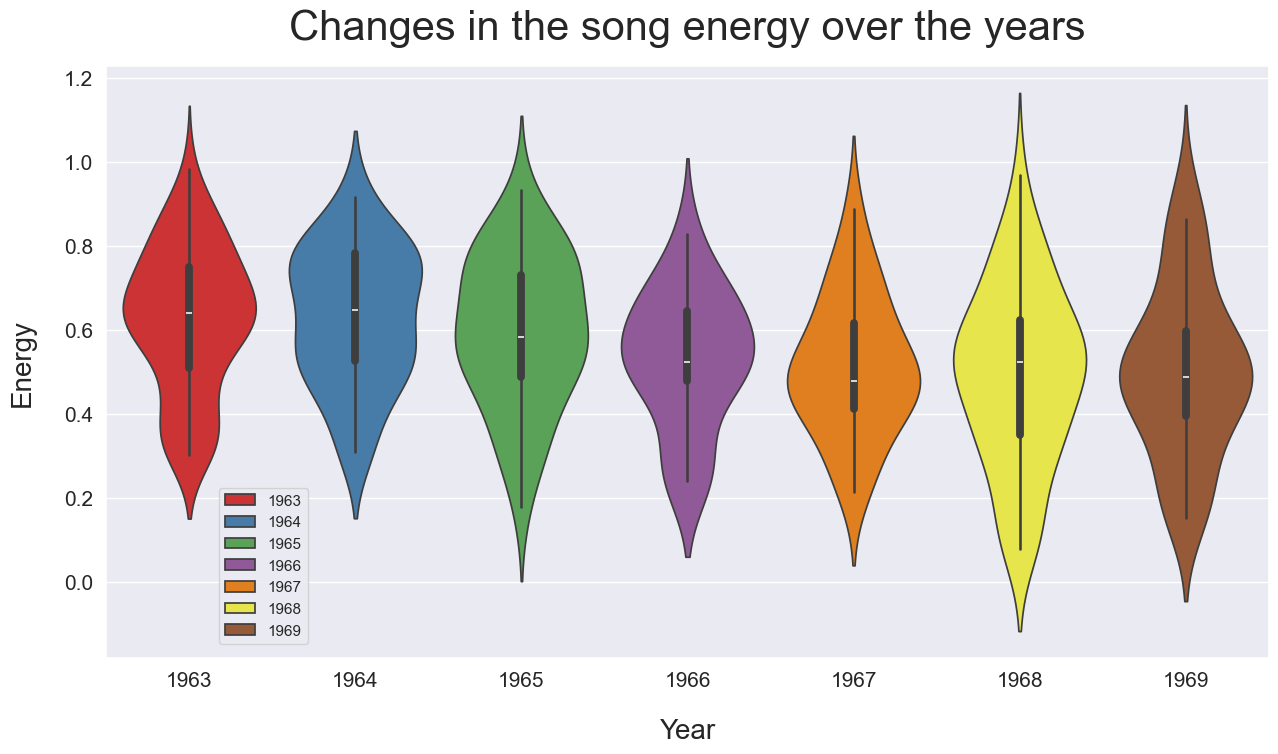

In [273]:
# Years to show the violin plots for
years = (songs.Year >= 1963) & (songs.Year <= 1969)

# Filter data by years and ensure Year is a categorical variable
filtered_data = songs.loc[years, :]
filtered_data.loc[:, 'Year'] = filtered_data['Year'].astype('category')

# Create the violin plot with categorical Year
v = sb.violinplot(x='Year', hue='Year', y='Energy', data=filtered_data, palette='Set1')

# Set plot parameters
v.axes.set_title('Changes in the song energy over the years',fontsize=30, y=1.03)
v.set_xlabel('Year',fontsize=20, labelpad=20)
v.set_ylabel('Energy',fontsize=20, labelpad=20)
v.tick_params(labelsize=15)
v.legend(bbox_to_anchor=(0.18, 0.3))

# Adjust spacing between title and plot
plt.subplots_adjust(top=0.85)  # Adjust the top margin

# Save the plot
plt.savefig('../data/The Beatles songs energy.png')

plt.show()

### Danceability

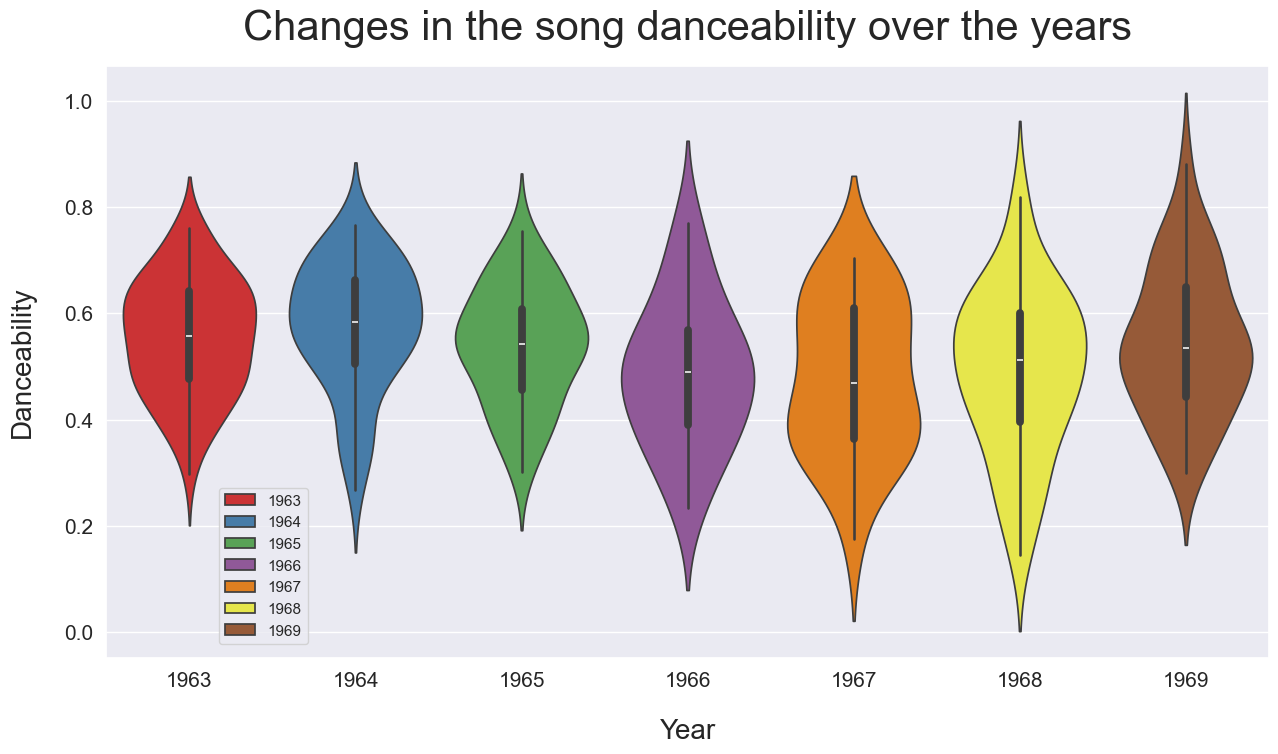

In [274]:
# Years to show the violin plots for
years = (songs.Year >= 1963) & (songs.Year <= 1969)

# Filter data by years and ensure Year is a categorical variable
filtered_data = songs.loc[years, :]
filtered_data.loc[:, 'Year'] = filtered_data['Year'].astype('category')

# Create the violin plot with categorical Year
v = sb.violinplot(x='Year', hue='Year', y='Danceability', data=filtered_data, palette='Set1')

# Set plot parameters
v.axes.set_title('Changes in the song danceability over the years',fontsize=30, y=1.03)
v.set_xlabel('Year',fontsize=20, labelpad=20)
v.set_ylabel('Danceability',fontsize=20, labelpad=20)
v.tick_params(labelsize=15)
v.legend(bbox_to_anchor=(0.18, 0.3))

# Adjust spacing between title and plot
plt.subplots_adjust(top=0.85)  # Adjust the top margin

# Save the plot
plt.savefig('../data/The Beatles songs danceability.png')

plt.show()

### Speechiness

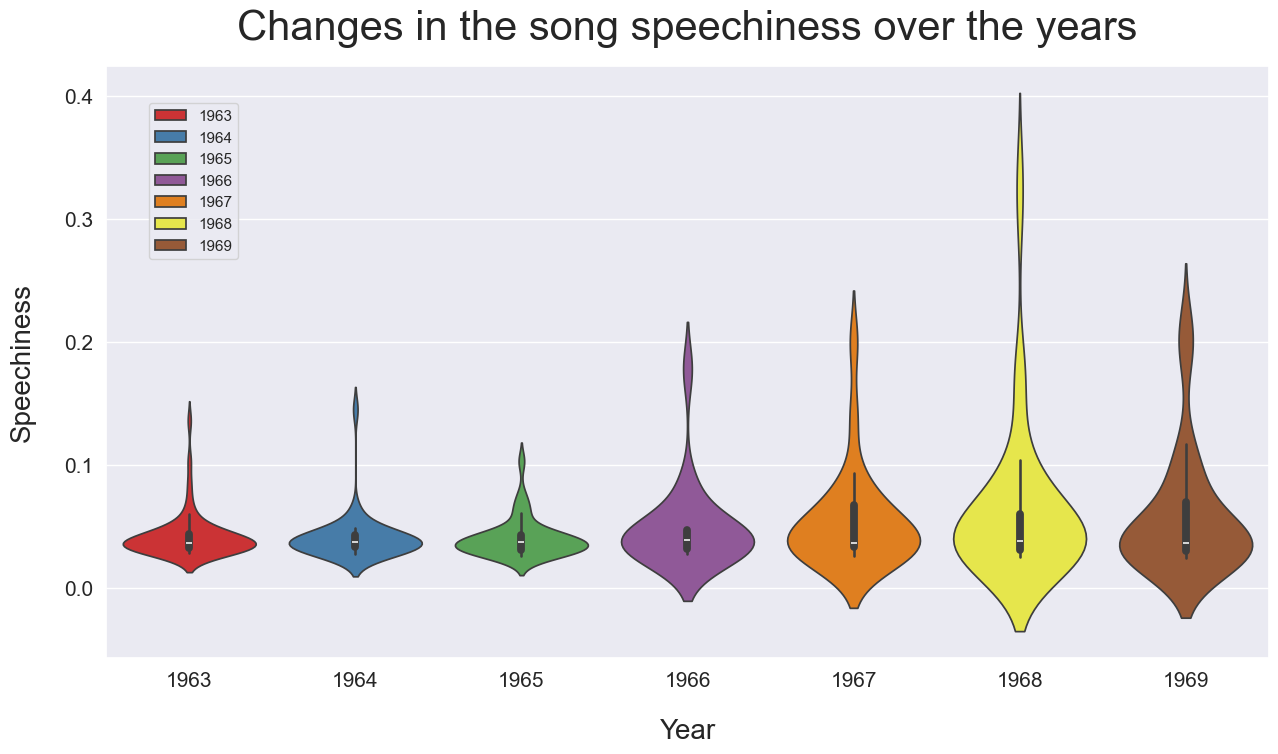

In [275]:
# Years to show the violin plots for
years = (songs.Year >= 1963) & (songs.Year <= 1969)

# Filter data by years and ensure Year is a categorical variable
filtered_data = songs.loc[years, :]
filtered_data.loc[:, 'Year'] = filtered_data['Year'].astype('category')

# Create the violin plot with categorical Year
v = sb.violinplot(x='Year', hue='Year', y='Speechiness', data=filtered_data, palette='Set1')

# Set plot parameters
v.axes.set_title('Changes in the song speechiness over the years',fontsize=30, y=1.03)
v.set_xlabel('Year',fontsize=20, labelpad=20)
v.set_ylabel('Speechiness',fontsize=20, labelpad=20)
v.tick_params(labelsize=15)
v.legend(bbox_to_anchor=(0.12, 0.95))

# Adjust spacing between title and plot
plt.subplots_adjust(top=0.85)  # Adjust the top margin

# Save the plot
plt.savefig('../data/The Beatles songs speechiness.png')

plt.show()

### Instrumentalness

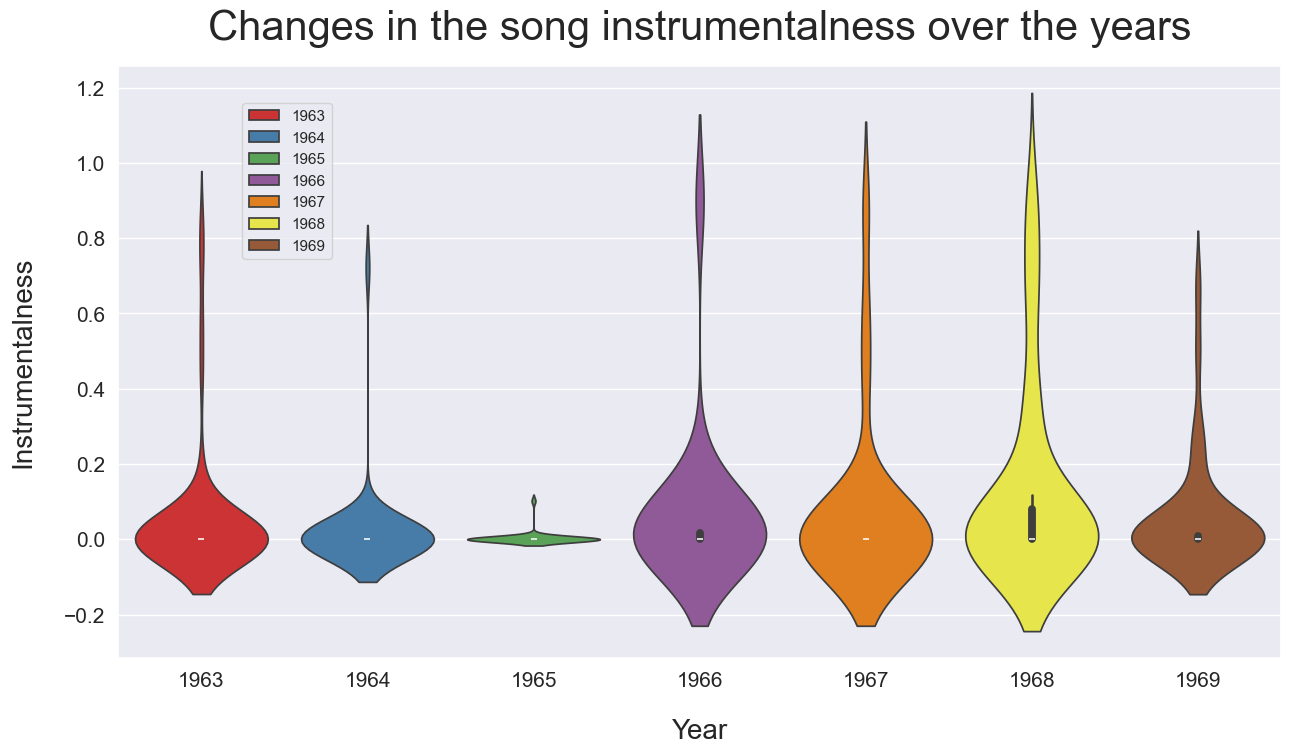

In [276]:
# Years to show the violin plots for
years = (songs.Year >= 1963) & (songs.Year <= 1969)

# Filter data by years and ensure Year is a categorical variable
filtered_data = songs.loc[years, :]
filtered_data.loc[:, 'Year'] = filtered_data['Year'].astype('category')

# Create the violin plot with categorical Year
v = sb.violinplot(x='Year', hue='Year', y='Instrumentalness', data=filtered_data, palette='Set1')

# Set plot parameters
v.axes.set_title('Changes in the song instrumentalness over the years',fontsize=30, y=1.03)
v.set_xlabel('Year',fontsize=20, labelpad=20)
v.set_ylabel('Instrumentalness',fontsize=20, labelpad=20)
v.tick_params(labelsize=15)
v.legend(bbox_to_anchor=(0.19, 0.95))

# Adjust spacing between title and plot
plt.subplots_adjust(top=0.85)  # Adjust the top margin

# Save the plot
plt.savefig('../data/The Beatles songs instrumentalness.png')

plt.show()

### Acousticness

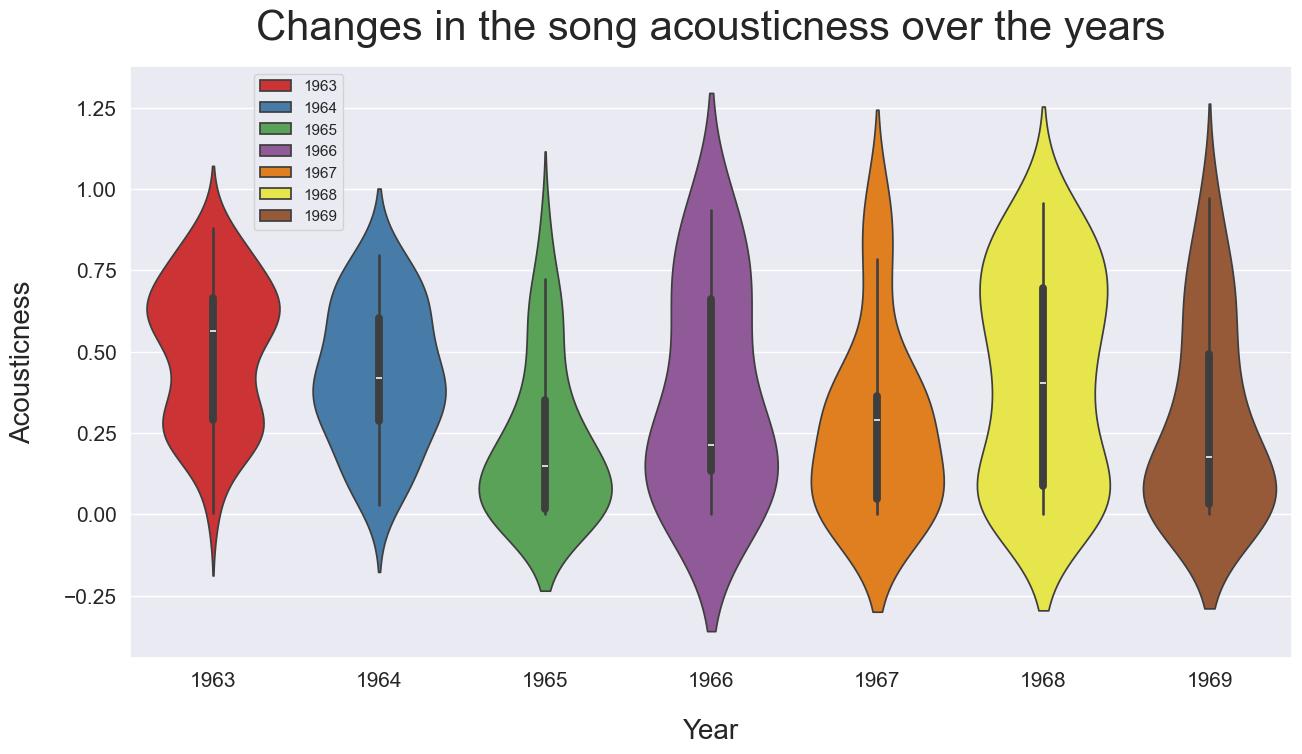

In [277]:
# Years to show the violin plots for
years = (songs.Year >= 1963) & (songs.Year <= 1969)

# Filter data by years and ensure Year is a categorical variable
filtered_data = songs.loc[years, :]
filtered_data.loc[:, 'Year'] = filtered_data['Year'].astype('category')

# Create the violin plot with categorical Year
v = sb.violinplot(x='Year', hue='Year', y='Acousticness', data=filtered_data, palette='Set1')

# Set plot parameters
v.axes.set_title('Changes in the song acousticness over the years',fontsize=30, y=1.03)
v.set_xlabel('Year',fontsize=20, labelpad=20)
v.set_ylabel('Acousticness',fontsize=20, labelpad=20)
v.tick_params(labelsize=15)
v.legend(bbox_to_anchor=(0.19, 1))

# Adjust spacing between title and plot
plt.subplots_adjust(top=0.85)  # Adjust the top margin

# Save the plot
plt.savefig('../data/The Beatles songs acousticness.png')

plt.show()

### Loudness

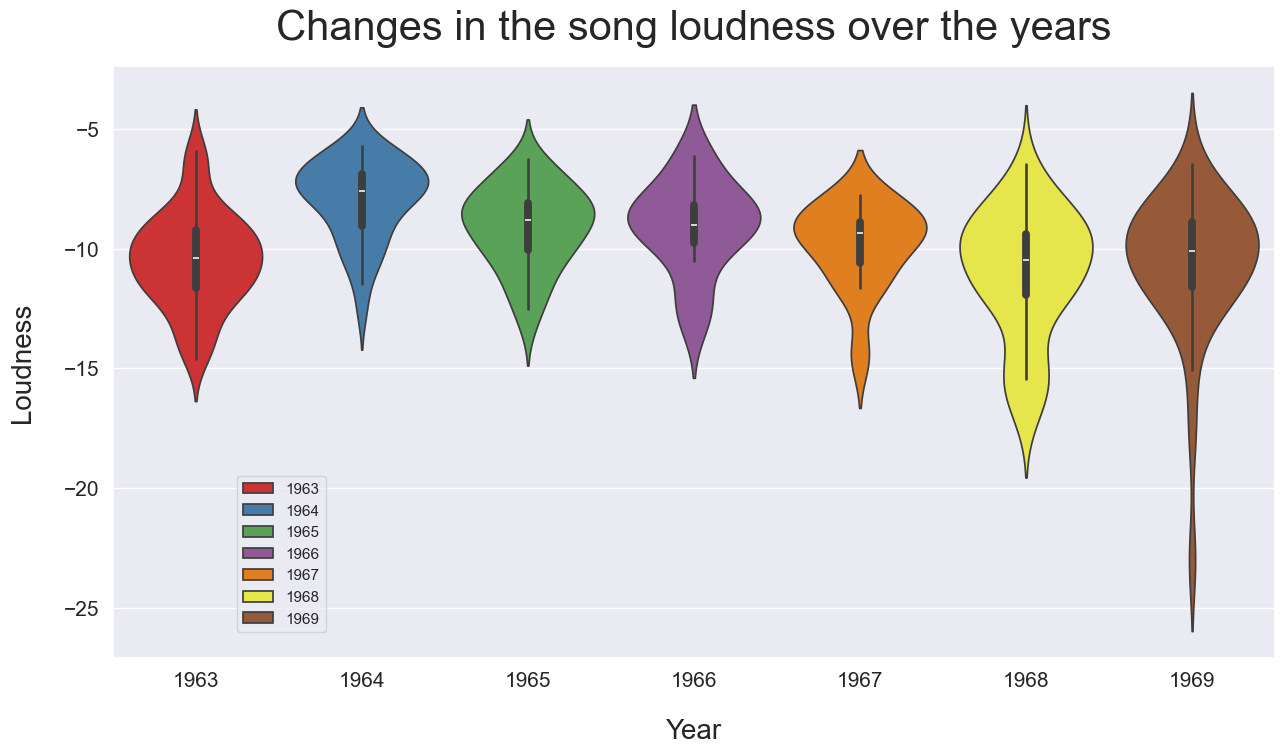

In [278]:
# Years to show the violin plots for
years = (songs.Year >= 1963) & (songs.Year <= 1969)

# Filter data by years and ensure Year is a categorical variable
filtered_data = songs.loc[years, :]
filtered_data.loc[:, 'Year'] = filtered_data['Year'].astype('category')

# Create the violin plot with categorical Year
v = sb.violinplot(x='Year', hue='Year', y='Loudness', data=filtered_data, palette='Set1')

# Set plot parameters
v.axes.set_title('Changes in the song loudness over the years',fontsize=30, y=1.03)
v.set_xlabel('Year',fontsize=20, labelpad=20)
v.set_ylabel('Loudness',fontsize=20, labelpad=20)
v.tick_params(labelsize=15)
v.legend(bbox_to_anchor=(0.19, 0.32))

# Adjust spacing between title and plot
plt.subplots_adjust(top=0.85)  # Adjust the top margin

# Save the plot
plt.savefig('../data/The Beatles songs loudness.png')

plt.show()

### Tempo

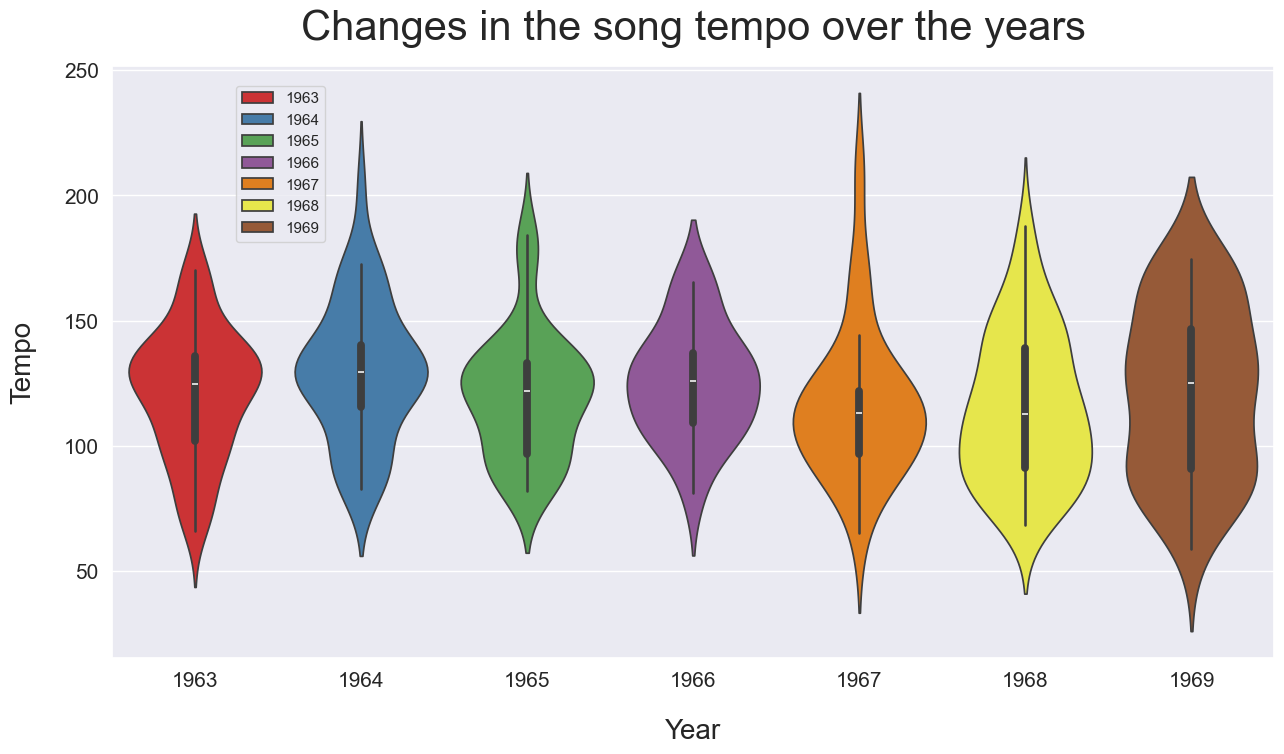

In [279]:
# Years to show the violin plots for
years = (songs.Year >= 1963) & (songs.Year <= 1969)

# Filter data by years and ensure Year is a categorical variable
filtered_data = songs.loc[years, :]
filtered_data.loc[:, 'Year'] = filtered_data['Year'].astype('category')

# Create the violin plot with categorical Year
v = sb.violinplot(x='Year', hue='Year', y='Tempo', data=filtered_data, palette='Set1')

# Set plot parameters
v.axes.set_title('Changes in the song tempo over the years',fontsize=30, y=1.03)
v.set_xlabel('Year',fontsize=20, labelpad=20)
v.set_ylabel('Tempo',fontsize=20, labelpad=20)
v.tick_params(labelsize=15)
v.legend(bbox_to_anchor=(0.19, 0.98))

# Adjust spacing between title and plot
plt.subplots_adjust(top=0.85)  # Adjust the top margin

# Save the plot
plt.savefig('../data/The Beatles songs tempo.png')

plt.show()

## Popularity of The Beatles songs today (heatmap)

Read the dataset ('../data/The Beatles songs dataset, 285x46, v1 (Top50).csv').

In [280]:
# Get the songs as a pd.DataFrame object from '../data/The Beatles songs dataset, 285x46, v1 (Top50).csv'
songs = pd.read_csv('../data/The Beatles songs dataset, 285x46, v1 (Top50).csv')
display(songs.sample(10))

,URI,Title,Year,Album,Popularity,Duration,Key,Mode,Tempo,Time_signature,...,Highest position (Billboard),Weeks at No1 (Billboard),Top 50 (Billboard),Top 50 (Ultimate classic rock),Top 50 (Rolling Stone),Top 50 (NME),Top 50 (Top50songs.org),"Top 50 (USA today, 2017)","Top 50 (Vulture, by Bill Wyman)",Top50
230,spotify:track:5845nYfGBbBomqEnf7pC7Q,That Means a Lot,1965,Anthology 2,34,146,9,1,124.225,4,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,No
245,spotify:track:0voUr8lubIafUVJlauJxYF,Things We Said Today,1964,A Hard Day's Night,56,158,2,0,137.054,4,...,-1,-1,-1,-1,47,-1,-1,-1,-1,No
185,spotify:track:76ncj5k8RGPo49wEyDzrb6,Ooh! My Soul,1963,Live at the BBC,24,98,4,1,96.721,4,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,No
142,spotify:track:2wh66N0HWVzwSB0KV7mdQ5,Keep Your Hands Off My Baby,1963,Live at the BBC,31,151,7,1,134.925,4,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,No
215,spotify:track:6tVFuB5HzRLUlLOSgT3enU,So How Come (No One Loves Me),1963,Live at the BBC,25,115,7,1,140.473,4,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,No
122,spotify:track:0gd50I2gKioJ59C827EdAY,I'm Happy Just to Dance with You,1964,A Hard Day's Night,57,118,6,0,132.115,4,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,No
139,spotify:track:5FnpXVgDOk2sLT58qM22Of,Julia,1968,The Beatles,57,174,2,1,134.706,4,...,-1,-1,-1,-1,-1,48,-1,43,50,No
119,spotify:track:4VMOdHVfB57lNhSDadhOBc,I'll Get You,1963,Past Masters (Vols. 1 & 2 / Remastered),42,124,9,1,125.700,4,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,No
114,spotify:track:09x9v1o51dbqi5H0u7UGfp,I Will,1968,The Beatles,68,106,5,1,103.110,4,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,No
128,spotify:track:3gwRWIbr5ycEVLIAXrWaw7,I've Got a Feeling,1969,Let It Be,59,217,2,1,165.156,4,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,No


### Valence

Create a new column in the dataframe, e.g. `Valence_category`, using `pd.qcut()` function to split the entire range of `songs.Valence` values into five equally sized subranges, `Very Low` to `Very High` (with ~equal number of elements in each subrange): `songs['Valence_category'] = pd.qcut(songs.Valence, q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])`.

In [281]:
# Create the new column
songs['Valence_category'] = pd.qcut(songs.Valence, q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
songs.Valence_category.sample(10)

25           Low
37     Very High
198       Medium
225       Medium
111     Very Low
214         High
264    Very High
243       Medium
31          High
269       Medium
Name: Valence_category, dtype: category
Categories (5, object): ['Very Low' < 'Low' < 'Medium' < 'High' < 'Very High']

In [282]:
# Check that the type of its values is Categorical, using type(<pd.df>.<new column>.values)
type(songs.Valence_category.values)
# Display the categories in the new column using <pd.df>.<new column>.cat.categories
songs.Valence_category.cat.categories

Index(['Very Low', 'Low', 'Medium', 'High', 'Very High'], dtype='object')

In [283]:
# Check value_counts() for 'valence_category' (the counts should be more or less equal)
songs.Valence_category.value_counts()

Valence_category
Low          58
Very Low     57
Medium       57
High         57
Very High    56
Name: count, dtype: int64

Rearrange the categories of `valence_category` to make the output natural.
Use `<pd.df>['<column>'] = pd.Categorical(<pd.df>[<column>], categories=['<cat1>, <cat2>, ...'], ordered=True)`. In this example, order categories from `Very High` to `Very Low`.

In [284]:
songs.Valence_category = pd.Categorical(songs.Valence_category, 
                                        categories=['Very High', 'High', 'Medium', 'Low', 'Very Low'], 
                                        ordered=True)

Create a suitable pivot table. Use `<pivot table> = <pd.df>.pivot_table(values='<column with values to show on the heatmap>', index='<categorical index>', columns='<column>')`
- `values` (to be shown in the cells): `Popularity`
- `index` (to be shown on y-axis): `Valence_category`
- `columns` (to be shown on x-axis): `Year`

In [285]:
pivot_table = songs.pivot_table(values='Popularity', index='Valence_category', columns='Year')

Plot the corresponding heatmap. Based on [this](https://pythonbasics.org/seaborn-heatmap/), [this](https://seaborn.pydata.org/generated/seaborn.heatmap.html), and [this](https://stackoverflow.com/a/29648332/1899061).

It is often a good idea to change the default figure size first, using `sb.set_theme(rc={'figure.figsize': (<x_size>, <y_size>)})`, to avoid cluttering on the heatmap (alternatively, use something like `plt.figure(layout='constrained', facecolor='navajowhite', figsize=(5, 3.5))`). Here `rc` stands for 'run command' - essentially, configurations which will execute when running the code. Experiment with `(<x_size>, <y_size>)`. The values that have worked well in this example: (15.7, 5.27).

Then use `sb.heatmap(data=<pivot table>, annot=True, fmt='<format string>', cmap='<color map>');`
- `data=<pivot table>`: the pivot table created in the previous step
- `annot=True`: annotate heatmap cells with values
- `fmt='<format_string>'`: for example, use `'.0f'` to show int values in annotations, not scientific notation (`'g'` for using mixed int and float annotations)
- `cmap='<color map>'`: color map (see [this](https://10xsoft.org/courses/data-analysis/mastering-data-visualization-with-python/section-4-data-visualization-using-seaborn/colour-palettes-seaborn/)); a good one is `viridis`

To set the title for the heatmap, or to change the axes labels, use (<b>AFTER</b> the call to `sb.heatmap()`!) something like:

`plt.title('<title>', loc='left', color='<color>', alpha=0.4, size=14)`<br>
`plt.xlabel('<xlabel>', size=<font size>, color='<color>')`<br>
`plt.ylabel('<ylabel>', size=<font size>, color='<color>')`<br>
`plt.show()`    # it's a must

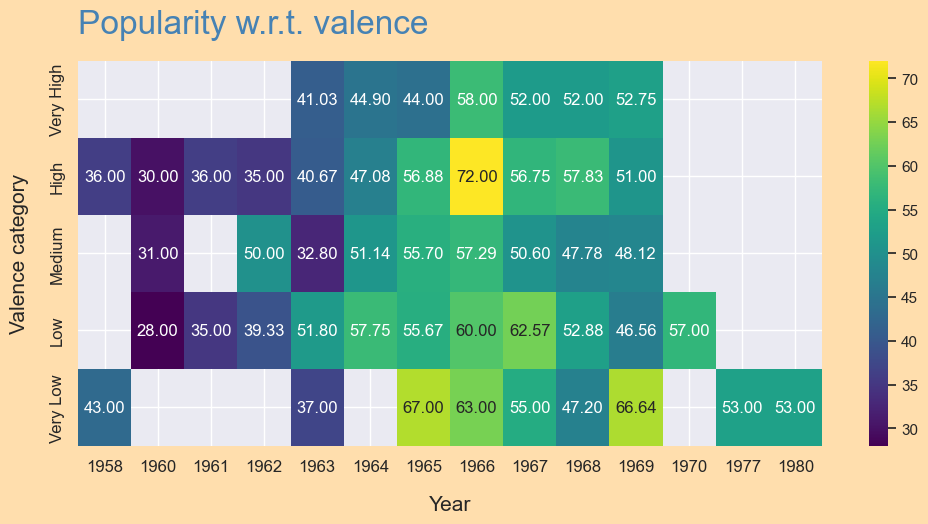

In [300]:
# sb.set_theme(rc={'figure.figsize': (15.7, 5.27)})
plt.figure(facecolor='navajowhite', figsize=(12, 5))
h = sb.heatmap(data=pivot_table, annot=True, fmt='.2f', cmap='viridis')
plt.title('Popularity w.r.t. valence', loc='left', color='steelblue', size=24, y=1.05)

# Set plot parameters
h.set_xlabel('Year',fontsize=15, labelpad=15)
h.set_ylabel('Valence category',fontsize=15, labelpad=15)
h.tick_params(labelsize=12)

# Save the plot
plt.savefig('../data/The Beatles songs popularity w.r.t. valence (heatmap).png')

plt.show()

<u>Save this version as a new *.csv* file, e.g. `../data/The Beatles songs dataset, 285x47, v0 (categories).csv`, for possible use in other examples.</u> (`<pd.df>.to_csv('<path>')`)

In [301]:
songs.to_csv('../data/The Beatles songs dataset, 285x47, v0 (categories).csv', index=False)

### Average instrumentalness
Average instrumentalness of songs over the years, represented as circles with sizes proportional to the numbers of songs.

In [302]:
songs = pd.read_csv('../data/The Beatles songs dataset, 285x47, v0 (categories).csv')
songs.sample(10)

,URI,Title,Year,Album,Popularity,Duration,Key,Mode,Tempo,Time_signature,...,Weeks at No1 (Billboard),Top 50 (Billboard),Top 50 (Ultimate classic rock),Top 50 (Rolling Stone),Top 50 (NME),Top 50 (Top50songs.org),"Top 50 (USA today, 2017)","Top 50 (Vulture, by Bill Wyman)",Top50,Valence_category
163,spotify:track:2S8xyNRJX1XQdo3qnTuovI,Maxwell's Silver Hammer,1969,Abbey Road,61,207,2,1,131.120,4,...,-1,-1,-1,-1,-1,42,-1,-1,No,Medium
271,spotify:track:2rQvZscmpb6a7ejDiKprcL,Yes It Is,1965,Past Masters (Vols. 1 & 2 / Remastered),46,161,4,1,132.571,4,...,-1,-1,-1,-1,-1,-1,-1,-1,No,Very Low
197,spotify:track:5dZ8PeKKZJLIQAWNTdp8WX,Revolution 9,1968,The Beatles,47,502,2,0,91.158,4,...,-1,-1,-1,-1,-1,-1,-1,-1,No,Very Low
17,spotify:track:4KRgqwb4kvBuTz1utbYxfb,And Your Bird Can Sing,1966,Revolver,58,121,4,1,132.590,4,...,-1,-1,-1,-1,30,-1,-1,33,No,Very High
222,spotify:track:4nwKdZID1ht0lDBJ5h2p87,Sun King,1969,Abbey Road,59,146,2,1,74.994,4,...,-1,-1,-1,-1,-1,-1,-1,-1,No,Very Low
6,spotify:track:7fh53ta3vAOGJMQ4i5tCHe,A Taste of Honey,1963,Please Please Me,51,163,1,0,101.408,3,...,-1,-1,-1,-1,-1,-1,-1,-1,No,Very Low
191,spotify:track:6EHuOufBeL6vk3TvVJB5qo,Please Please Me,1962,Please Please Me,61,120,4,1,139.388,4,...,-1,18,19,20,-1,-1,28,5,Yes,Medium
186,spotify:track:7Msq9qojB7yORuJvz49iUy,P.S. I Love You,1962,Please Please Me,54,126,2,1,134.435,4,...,-1,34,-1,-1,-1,-1,-1,-1,Yes,Medium
137,spotify:track:2ue1KRstSKHF8jQkIJZiNC,It's Only Love,1965,Help!,56,115,0,1,113.155,3,...,-1,-1,-1,-1,-1,-1,-1,-1,No,Low
256,spotify:track:0CGbof9amBnsNlRhZ8IY2H,Wait,1965,Rubber Soul,55,136,6,0,127.201,4,...,-1,-1,-1,-1,-1,-1,-1,-1,No,Low


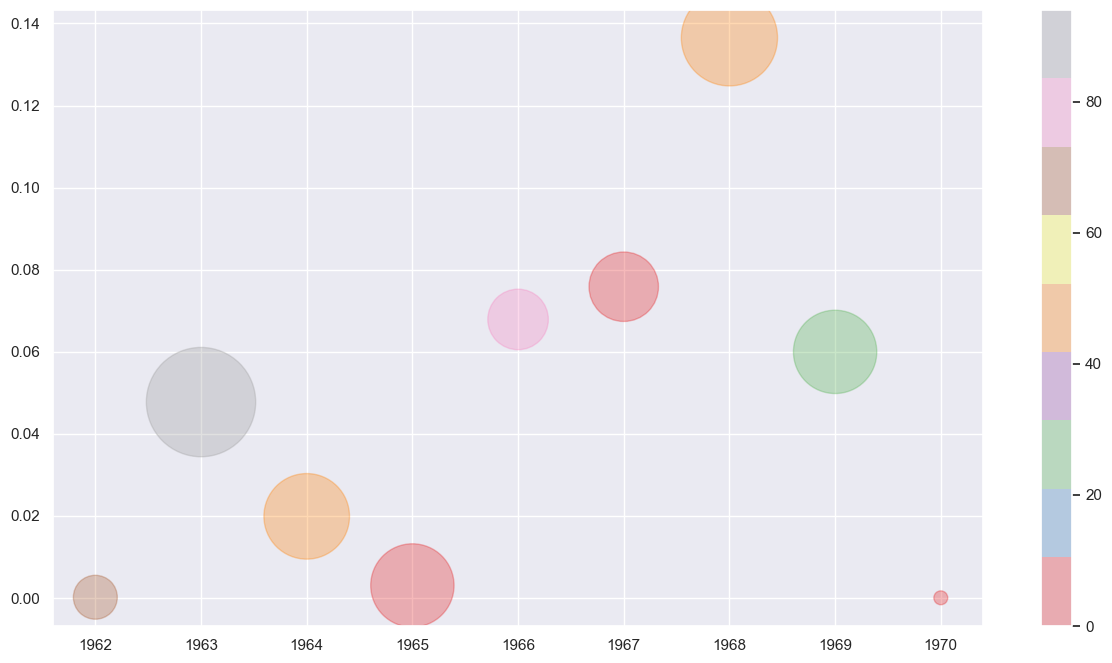

In [303]:
songs_by_year = songs.groupby('Year')
years_1962_1970 = np.array(range(1962, 1971))

avg_instrumentalness = []
for year in years_1962_1970:
    avg_instrumentalness.append(np.mean(songs_by_year.get_group(year)['Instrumentalness']))
avg_instrumentalness = np.array(avg_instrumentalness)

rng = np.random.RandomState(370)

colors = rng.choice(100, size=len(years_1962_1970), replace=False)            # random sample, no duplicates
# display(colors)

sizes = []
for year in years_1962_1970:
    sizes.append(len(songs_by_year.get_group(year)) * 100)                    # sizes proportional to the numbers of songs

plt.scatter(years_1962_1970, avg_instrumentalness,
            c=colors, s=sizes, alpha=0.3,                                     # alpha: the level of transparency
            cmap='Set1')                                                      # cmap: a pre-defined color map

# Save the plot
plt.savefig('../data/The Beatles songs average instrumentalness (scatterplot).png')

plt.colorbar();                                                               # show color scale